### Import Libraries

In [1088]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Load datasets 

In [1089]:
df  = pd.read_csv("data/train_s3TEQDk.csv")
train_df = df.copy()
test_df  = pd.read_csv("data/test_mSzZ8RL.csv")

In [1090]:
test_df  = pd.read_csv("data/test_mSzZ8RL.csv")

## Overview and Summary statistics

In [1091]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [1092]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         216400 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [1093]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000,245725.000,245725.000,245725.000
mean,43.856,46.959,1128403.101,0.237
std,14.829,32.353,852936.356,0.425
min,23.000,7.000,20790.000,0.000
25%,30.000,20.000,604310.000,0.000
50%,43.000,32.000,894601.000,0.000
75%,54.000,73.000,1366666.000,0.000
max,85.000,135.000,10352009.000,1.000


In [1094]:
df.describe(include = 'object')

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
count,245725,245725,245725,245725,245725,216400,245725
unique,245725,2,35,4,4,2,2
top,WCNSGK2V,Male,RG268,Self_Employed,X1,No,No
freq,1,134197,35934,100886,103718,144357,150290


In [1095]:
print("Numerical cols : {}".format(df._get_numeric_data().columns))
print("Categorical cols : {}".format(set(df.columns) - set(df._get_numeric_data().columns)))

Numerical cols : Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead'], dtype='object')
Categorical cols : {'Occupation', 'Is_Active', 'ID', 'Credit_Product', 'Channel_Code', 'Region_Code', 'Gender'}


### Inferences from overview

- Count of rows is 245725 and count of columns is 11
- Numerical columns --> 'Age', 'Vintage', 'Avg_Account_Balance'
- Categorical columns --> 'Occupation', 'Is_Active', 'ID', 'Credit_Product', 'Channel_Code', 'Region_Code', 'Gender'
- Target column --> Is_Lead
- Credit_Product has 29325 missing values other columns have no missing values

## Data Preprocessing

### 1. Duplicate rows
    - there are no duplicate rows

In [1096]:
df[df.duplicated()]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead


### 2. Columns with missing values %
    - Credit_Product has 11 % missing values, replacing with mode

In [1097]:
print(round(df.isnull().sum() / len(df)  * 100,2))

ID                     0.000
Gender                 0.000
Age                    0.000
Region_Code            0.000
Occupation             0.000
Channel_Code           0.000
Vintage                0.000
Credit_Product        11.930
Avg_Account_Balance    0.000
Is_Active              0.000
Is_Lead                0.000
dtype: float64


In [1098]:
df.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [1099]:
df.loc[pd.isnull(df['Credit_Product']), ['Credit_Product']] = "No"

In [1100]:
df.Credit_Product.value_counts()

No     173682
Yes     72043
Name: Credit_Product, dtype: int64

### 3. Delete columns which shouldn't impact Is_Lead
    - column ID is an identifier, we can row it

In [1101]:
df = df.drop(columns=['ID'])

## Univariate Analysis

### 1. How target variable is_lead is distributed

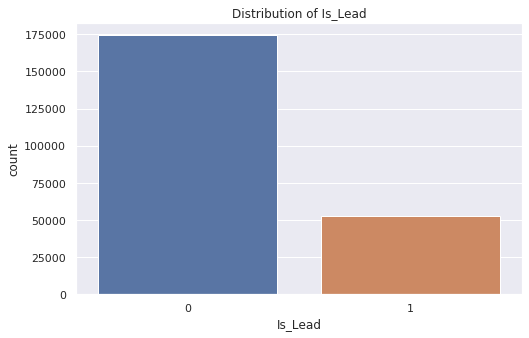

In [1174]:
sns.set(rc={'figure.figsize':(8,5)})
plt.title("Distribution of Is_Lead")
sns.countplot(x=df['Is_Lead'])

### 2. Univariate analysis of all features

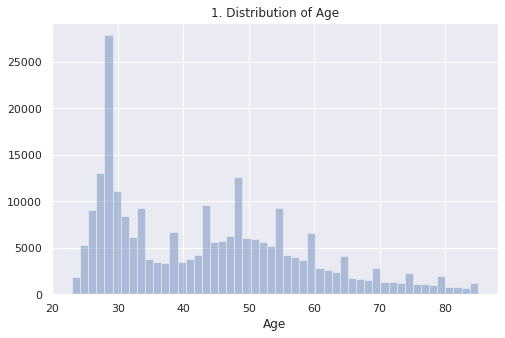

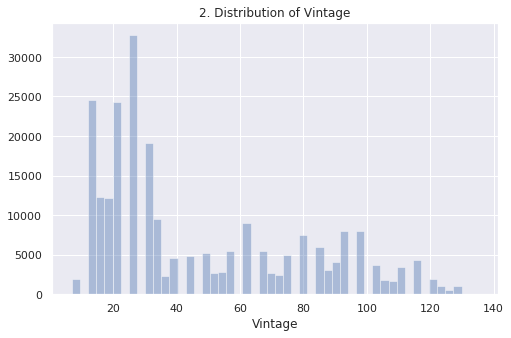

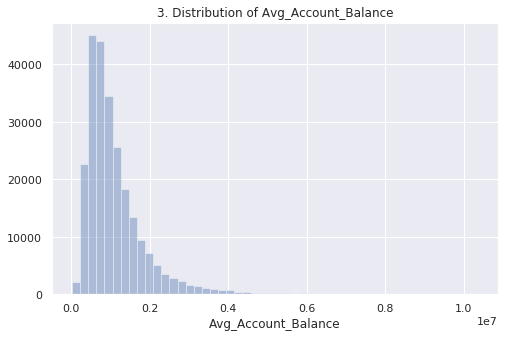

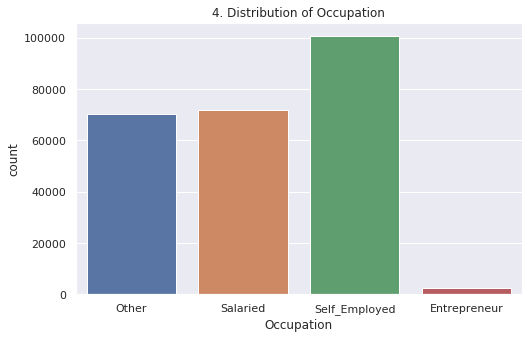

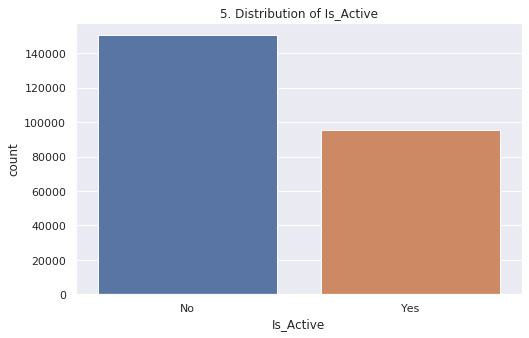

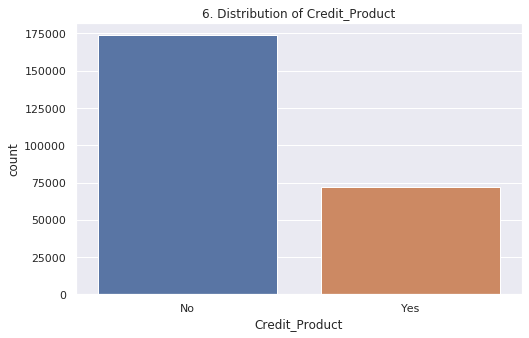

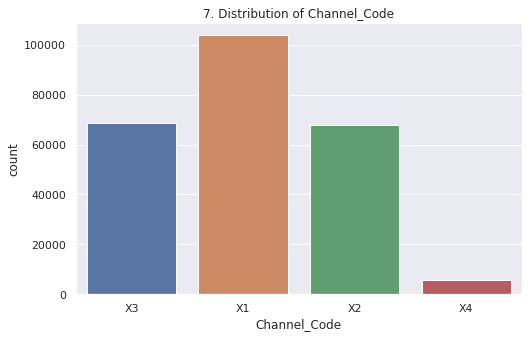

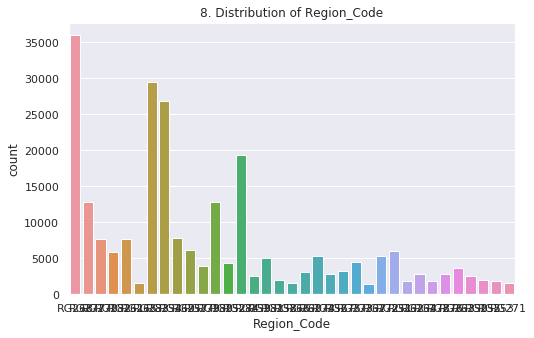

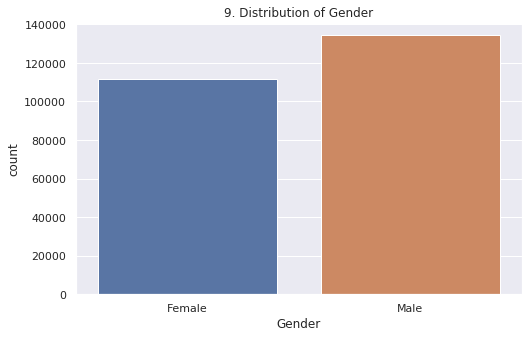

<Figure size 576x360 with 0 Axes>

In [1103]:
# Iterate on all features and visulize distribution
# numerical - distplot
# categorical - countplot

columns = ['Age', 'Vintage', 'Avg_Account_Balance', 'Occupation',
           'Is_Active', 'Credit_Product', 'Channel_Code', 'Region_Code', 'Gender']

sns.set(rc={'figure.figsize':(8,5)})
for idx, column in enumerate(columns):
    col = getattr(df, column)
    if col.dtype in ['int64', 'float64']:
        sns.distplot(x=col, kde=False)
    elif col.dtype.name in ['object']:
        sns.countplot(x=col)
    else:
        print("unknown column type {}:{}".format(col.name, col.dtype.name))
    plt.xlabel(col.name)
    plt.title("{}. Distribution of {}".format(str(idx + 1), col.name))
    plt.show()
    plt.clf()

In [1104]:
# Top 3 Region_Code
df.Region_Code.value_counts()[:3]

RG268    35934
RG283    29416
RG254    26840
Name: Region_Code, dtype: int64

In [1105]:
# Ratio of Lead to Not lead
df.Is_Lead.value_counts()[0] / df.Is_Lead.value_counts()[1]

3.215704776283283

In [1106]:
# Ratio of Customers Not active to Active
df.Credit_Product.value_counts()[0] / df.Credit_Product.value_counts()[1] 

2.410810210568688

In [1107]:
# Ratio of Customers using credit product to those not using
df.Is_Active.value_counts()[0] / df.Is_Active.value_counts()[1]

1.5747891234871902

In [1108]:
# Ratio of males to female customers
df.Gender.value_counts()[0] / df.Gender.value_counts()[1]

1.2032583745785812

In [1109]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000,245725.000,245725.000,245725.000
mean,43.856,46.959,1128403.101,0.237
std,14.829,32.353,852936.356,0.425
min,23.000,7.000,20790.000,0.000
25%,30.000,20.000,604310.000,0.000
50%,43.000,32.000,894601.000,0.000
75%,54.000,73.000,1366666.000,0.000
max,85.000,135.000,10352009.000,1.000


### Inferences from univariate analysis
    - Count of Lead is 3.2 times that of Not Lead
    - Median age is 43
    - Median Vintage is 32
    - Median of average account balance is 894,601
    - Top 3 region code are RG268 (35k), RG283 (29k), RG254 (26k)
    - Occupation Self employed is highest while entrepreneur is least
    - Channel code X1 is highest while X4 is least
    - Count of customers not active in last 3 months is 1.5 times that of active
    - Count of customers not using credit product is 2.4 times that of using
    - Count of male customers are 1.2 times that of females

In [1110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         245725 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


## Bivariate Analysis

### 1. Relationship between Is_Lead and other features

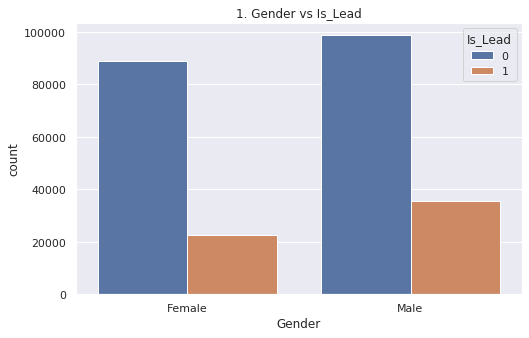

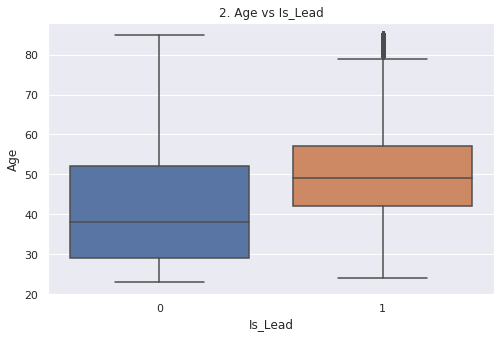

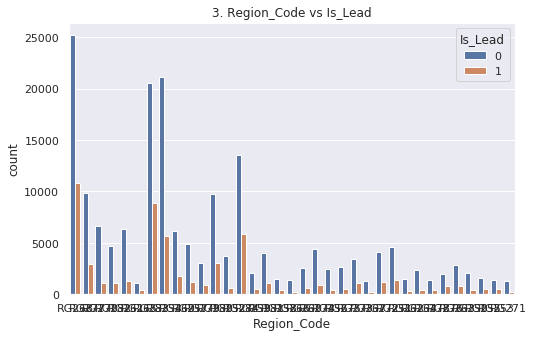

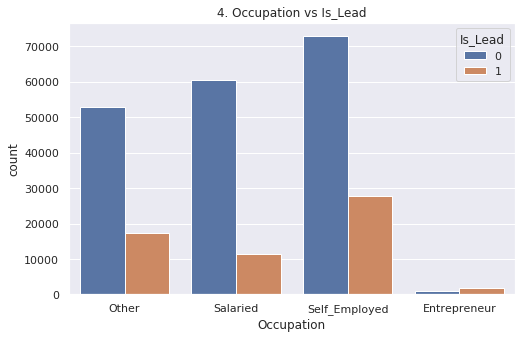

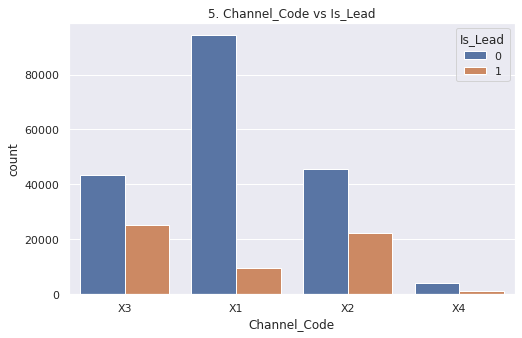

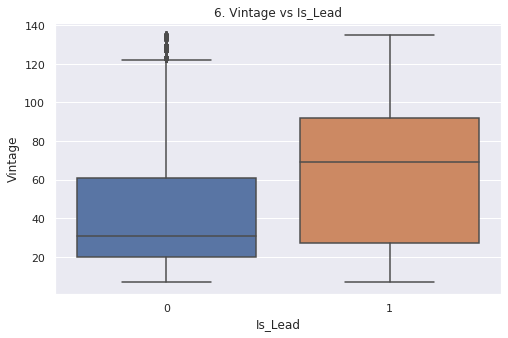

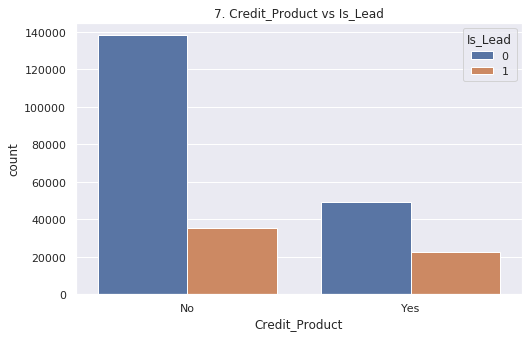

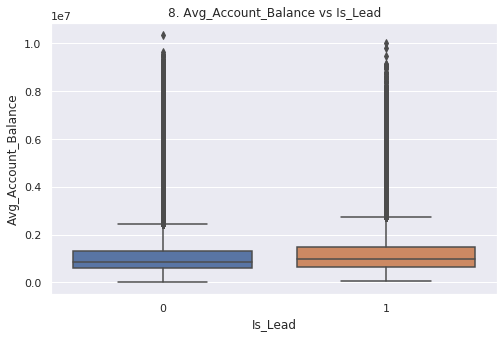

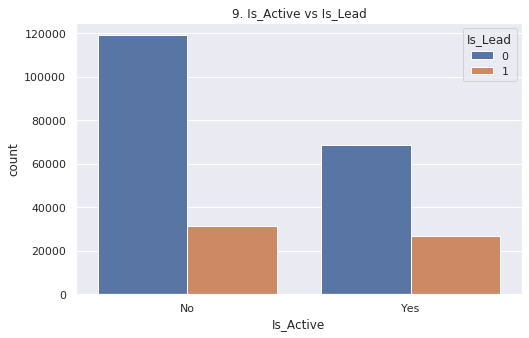

<Figure size 576x360 with 0 Axes>

In [1111]:
sns.set(rc={'figure.figsize':(8,5)})
target = 'Is_Lead'
for idx, column in enumerate(df.columns):
    col = getattr(df, column)

    if column == target:
        continue
    
    data_df = df.copy()
    if col.dtype in ['int64', 'float64']:
        sns.boxplot(x=target, y=column, data=data_df)
    elif col.dtype.name in ['object']:
        sns.countplot(x=column, hue=target, data=data_df)
    else:
        print("unknown column type {}:{}".format(col.name, col.dtype.name))
    
    plt.title("{}. {} vs {}".format(str(idx + 1), col.name, target))
    plt.show()
    plt.clf()

### Inferences from Bivariate Analysis
- There are more leads for customers of Age > 50
- There are more leads for Channel_Code X1
- There are more leads for Vintage > 60
- Average Account balance and Vintage outliers

### Handle outliers

In [1112]:
# Handle outliers in Avg_Account_Balance
df.Avg_Account_Balance.describe()

count     245725.000
mean     1128403.101
std       852936.356
min        20790.000
25%       604310.000
50%       894601.000
75%      1366666.000
max     10352009.000
Name: Avg_Account_Balance, dtype: float64

In [1113]:
# Fence calculation
1366666.000 + 1.5 * (1366666.000 - 604310.000)

2510200.0

In [1114]:
len(df[df.Avg_Account_Balance > 2510200])

14612

In [1115]:
df = df[df.Avg_Account_Balance < 2510200]

In [1116]:
# Handle outliers in Vintage
df.Vintage.describe()

count   231113.000
mean        46.245
std         32.007
min          7.000
25%         20.000
50%         32.000
75%         73.000
max        135.000
Name: Vintage, dtype: float64

In [1117]:
(54 - 30) * 1.5 + 54

90.0

In [1118]:
len(df[df.Vintage > 120])

3907

In [1119]:
df = df[df.Vintage < 120]

###   How lead percentage is affected by different features

In [1120]:
# categorical vs categorical relationship

def view_relationship_bw_categorical_variables(plot_df, feature, sort_by="feature"):
    
    # get counts of leads and total
    
    filtered_df = plot_df.loc[plot_df.Is_Lead == 1][[feature, "Is_Lead"]].copy()

    filtered_df = filtered_df[feature].value_counts().to_frame()
    filtered_df['total_count'] = df[feature].value_counts()
    filtered_df.rename({feature: 'lead_count'}, axis=1, inplace=True)

    # calulate percentage in each bin

    filtered_df['lead_percentage'] = filtered_df.apply(lambda row :
                                                          round(row['lead_count'] /
                                                                row['total_count'] * 100, 2), axis=1)
    filtered_df[feature] = filtered_df.index

    # plot bins and percentage
    if sort_by == 'feature':
        filtered_df = filtered_df.sort_values(by=feature, ascending=False)
    else:
        filtered_df = filtered_df.sort_values(by='lead_percentage', ascending=False)
    sns.barplot(data=filtered_df, x=feature, y='lead_percentage')
    return filtered_df


### 1. How gender affects lead percentage
    - male customers have 6 % higher chances to become lead

,lead_count,total_count,lead_percentage,Gender
Male,32237,123318,26.140,Male
Female,20774,103888,20.000,Female


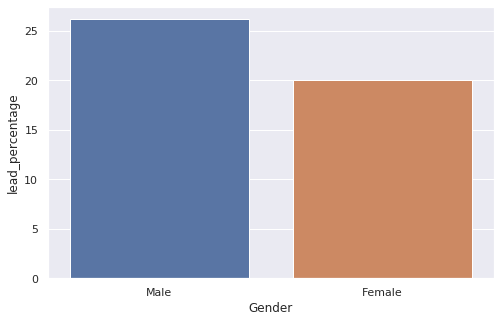

In [1121]:
sns.set(rc={'figure.figsize':(8,5)})
view_relationship_bw_categorical_variables(df, 'Gender')

### 2. How region code affects lead percentage
    - Region code 283, 284, 263 have higher conversions around 30 %

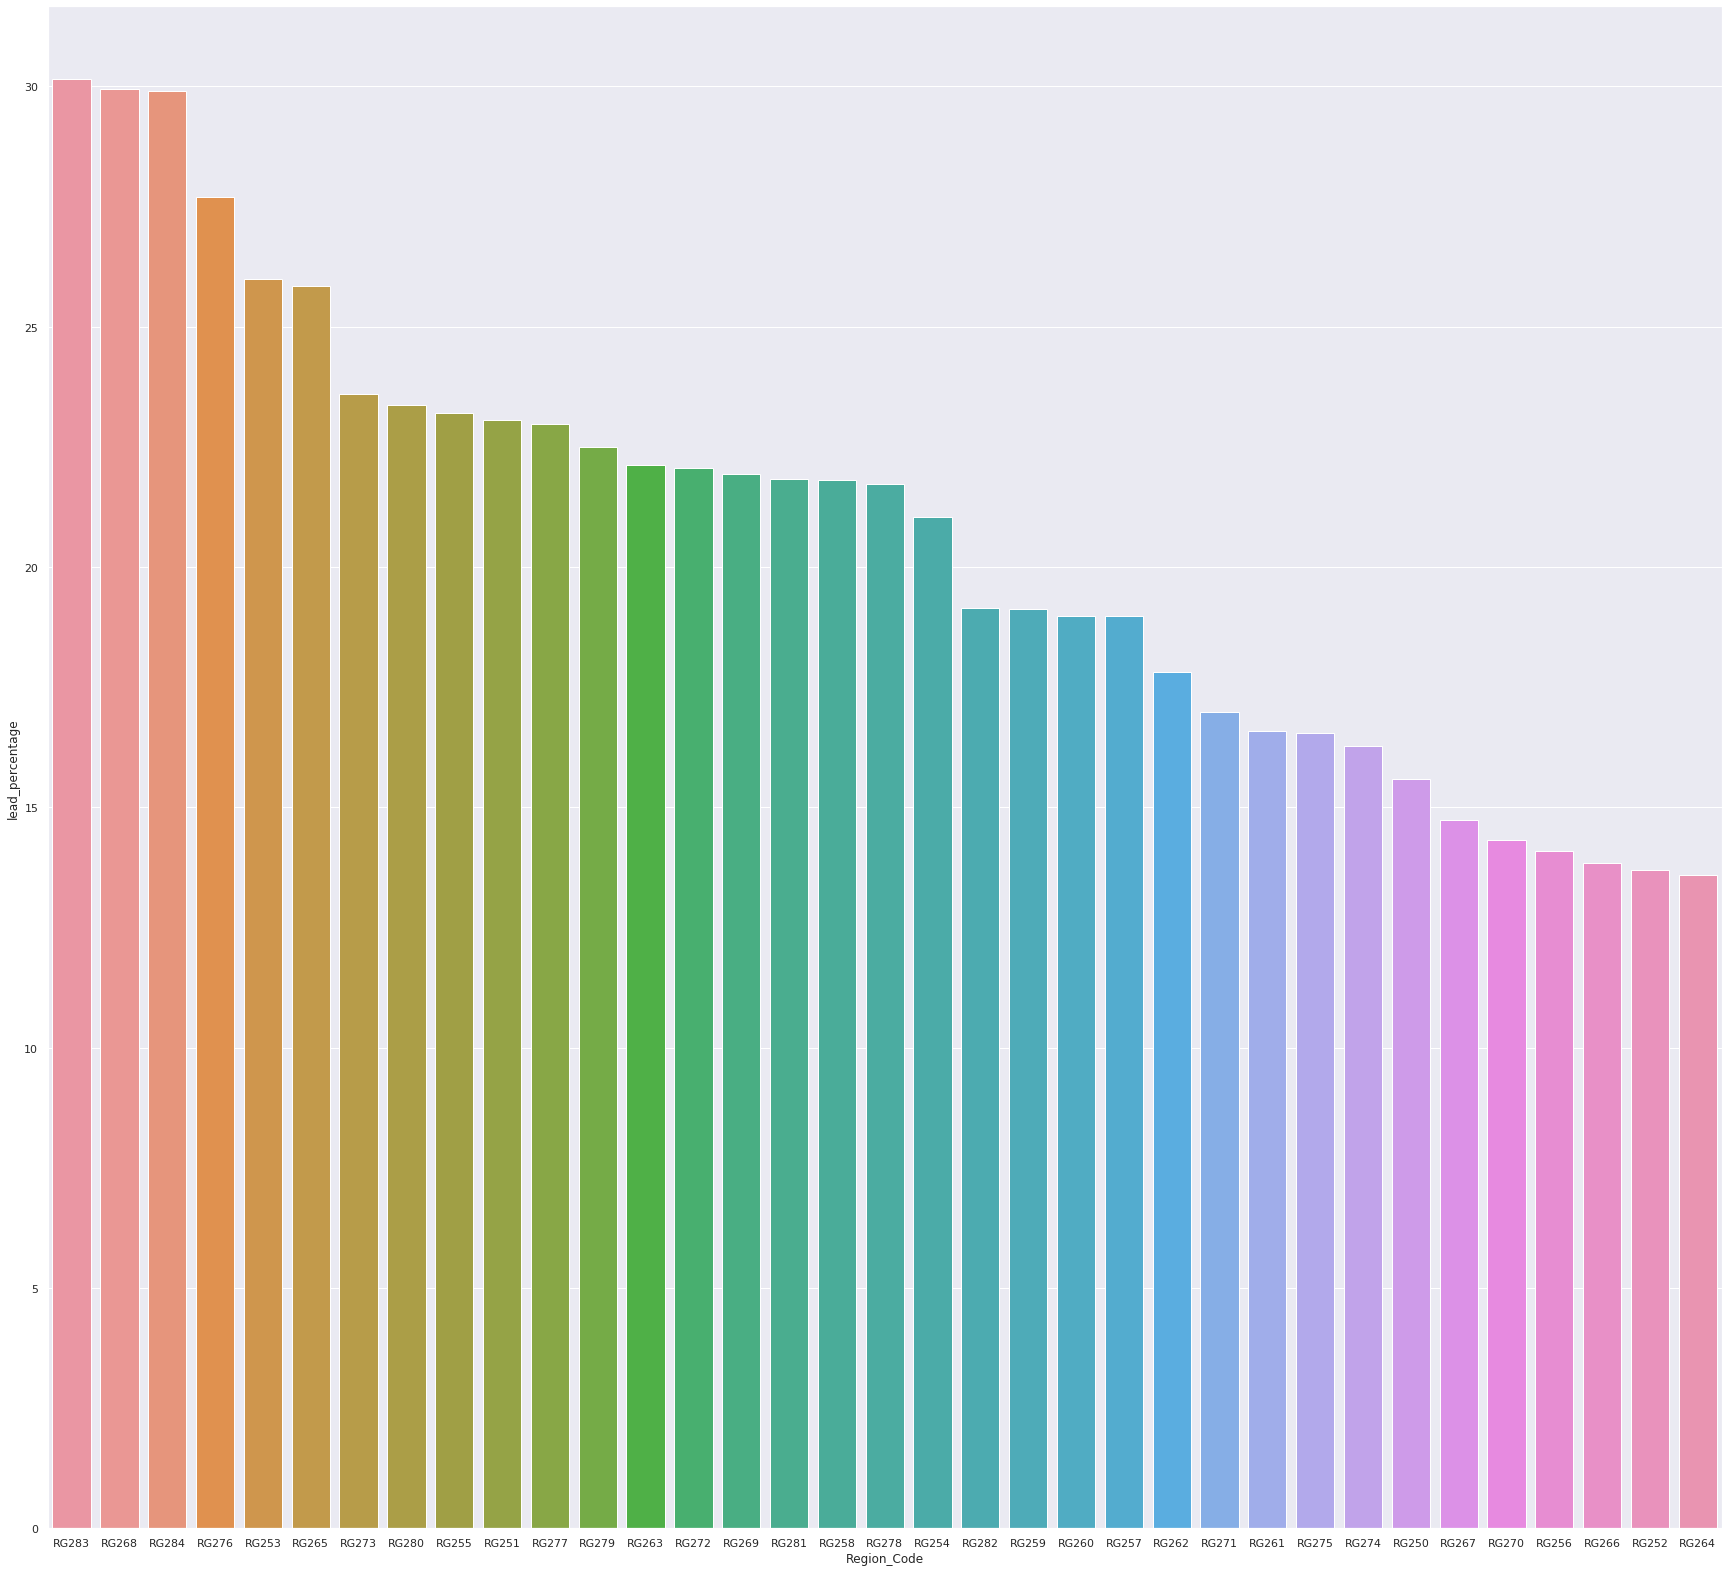

In [1122]:
sns.set(rc={'figure.figsize':(30,28)})
view_relationship_bw_categorical_variables(df, 'Region_Code', sort_by="target")
sns.set(rc={'figure.figsize':(8,5)})

### 3. How occupation affects lead percentage
    - Occupation Entrepreneur has highest lead conversions 65 %

,lead_count,total_count,lead_percentage,Occupation
Entrepreneur,1567,2380,65.840,Entrepreneur
Self_Employed,25733,93405,27.550,Self_Employed
Other,15191,63088,24.080,Other
Salaried,10520,68333,15.400,Salaried


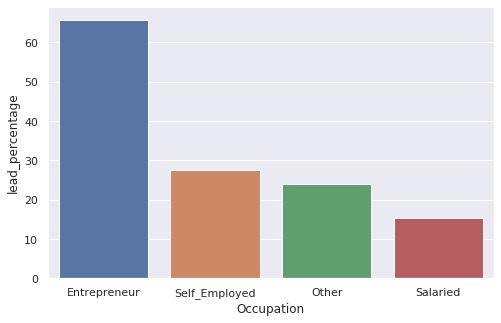

In [1123]:
view_relationship_bw_categorical_variables(df, 'Occupation', sort_by="target")

### 4. How Channel_Code affects lead percentage
    - Channel_Code X3 has highest lead conversions 36 % while channel X1 has lowest- 9%

,lead_count,total_count,lead_percentage,Channel_Code
X3,21827,59303,36.810,X3
X2,20958,63795,32.850,X2
X4,1343,5358,25.070,X4
X1,8883,98750,9.000,X1


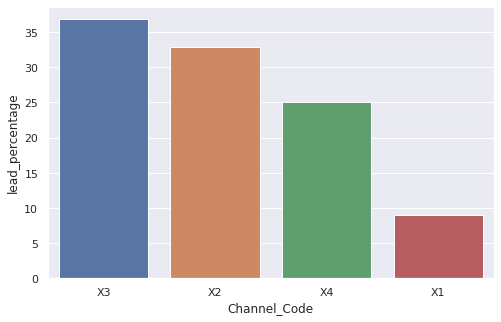

In [1124]:
view_relationship_bw_categorical_variables(df, 'Channel_Code', sort_by="target")

### 4. How Credit_Product affects lead percentage
    - Customers using credit product have 11% higher chance of converting to leads

,lead_count,total_count,lead_percentage,Credit_Product
Yes,20443,65850,31.040,Yes
No,32568,161356,20.180,No


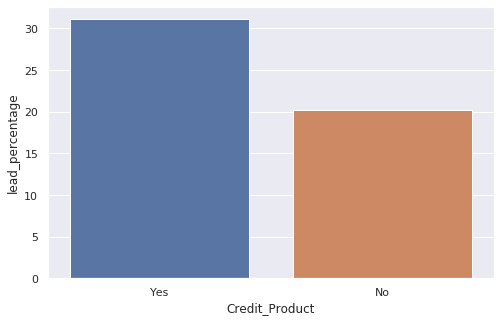

In [1125]:
view_relationship_bw_categorical_variables(df, 'Credit_Product', sort_by="target")

### 5. How Is_Active affects lead percentage
    - Customers active in last 3 months have 8% higher chance of becoming lead

,lead_count,total_count,lead_percentage,Is_Active
Yes,24184,86191,28.060,Yes
No,28827,141015,20.440,No


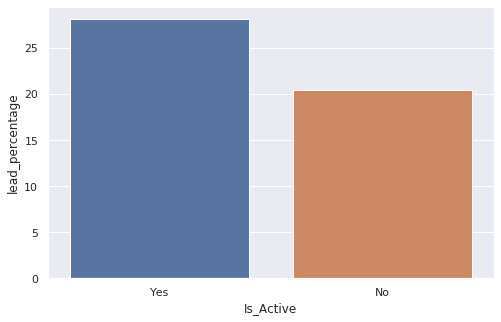

In [1126]:
view_relationship_bw_categorical_variables(df, 'Is_Active', sort_by="target")

In [1127]:
# categorical_and_numerical_relationship

def view_categorical_and_numerical_relationship(df, feature, bins=10):
    plot_df = df.copy()
    feature_column = getattr(plot_df, feature)
    plot_df['{}_bins'.format(feature)] = pd.cut(feature_column, bins=bins)

    # create another binned dti dataframe for Is_Lead == 1

    filtered_df = plot_df.loc[plot_df.Is_Lead == 1].copy()
    binned_col_name = '{}_bins'.format(feature)
    filtered_df[binned_col_name] = pd.cut(filtered_df[feature], bins=bins)

    # get count of leads and non leads in each bin

    count_df = plot_df[binned_col_name].value_counts().to_frame()
    filtered_df = filtered_df[binned_col_name].value_counts().to_frame()

    # calulate percentage of deaulters in each bin

    filtered_df['total_count'] = getattr(count_df, binned_col_name)
    filtered_df.rename({binned_col_name: 'lead_count'}, axis=1, inplace=True)

    filtered_df['lead_percentage'] = filtered_df.apply(lambda row :
                                                          round(row['lead_count'] /
                                                                row['total_count'] * 100, 2), axis=1)
    filtered_df[feature] = filtered_df.index
    filtered_df[feature] = filtered_df[feature].apply(lambda value : str(value).replace("]", "").replace("(", "").replace(",", " -"))
    filtered_df.reset_index(drop=True, inplace=True)

#     plot bins and lead percentage
    sns.barplot(data=filtered_df, x=feature, y='lead_percentage')
    return filtered_df

### 6. How Age affects lead percentage
    - Customers in the age group 45 to 65 and 75 to 85 have higher chances of becoming lead

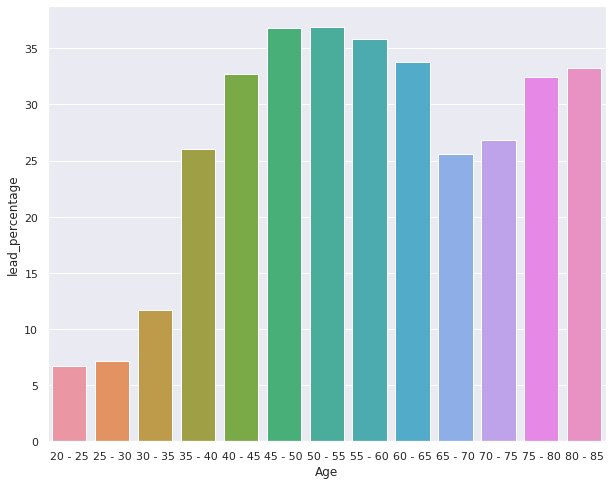

In [1128]:
bins = list(range(20, 90, 5))
sns.set(rc={'figure.figsize':(10,8)})
view_categorical_and_numerical_relationship(df, 'Age', bins)
sns.set(rc={'figure.figsize':(8,5)})

### 7. How Vinatge affects lead percentage
    - Customers with vintage 70 to 110 higher chances of becoming lead

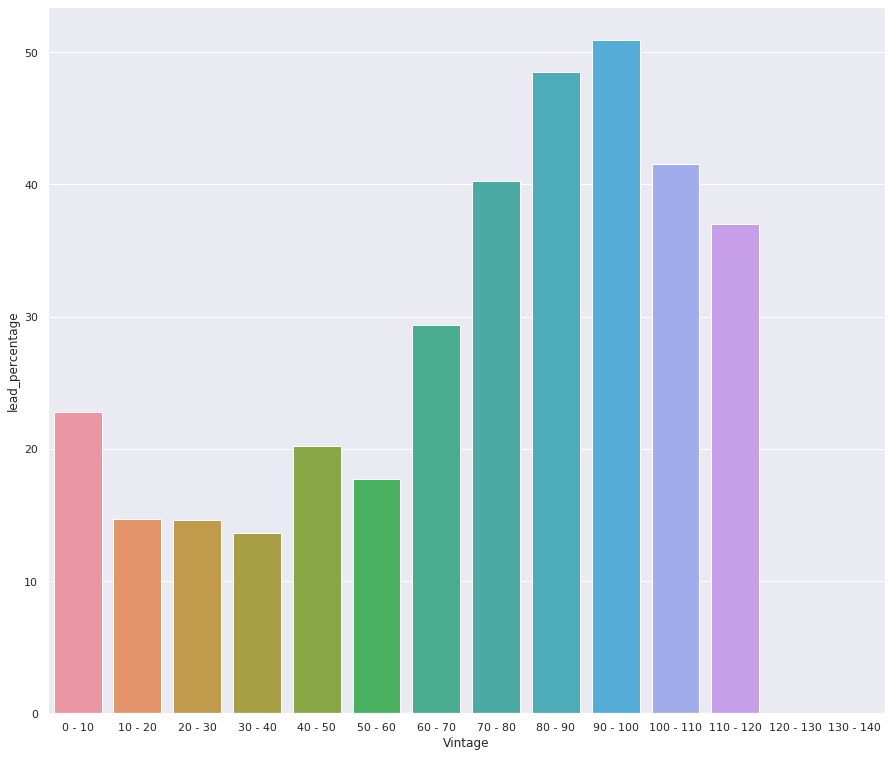

In [1129]:
bins = list(range(0, 150, 10))
sns.set(rc={'figure.figsize':(15, 13)})
view_categorical_and_numerical_relationship(df, 'Vintage', bins)
sns.set(rc={'figure.figsize':(10,8)})

### 7. How Avg_Account_Balance affects lead percentage
    - With increase in Avg_Account_Balance lead conversion chances increases

,lead_count,total_count,lead_percentage,Avg_Account_Balance
0,11940,55521,21.510,520000 - 770000
1,10398,44489,23.370,770000 - 1020000
2,8062,30941,26.060,1020000 - 1270000
3,7064,37623,18.780,270000 - 520000
4,5409,20536,26.340,1270000 - 1520000
5,3873,13890,27.880,1520000 - 1770000
6,2641,9486,27.840,1770000 - 2020000
7,1763,6371,27.670,2020000 - 2270000
8,708,4324,16.370,20000 - 270000


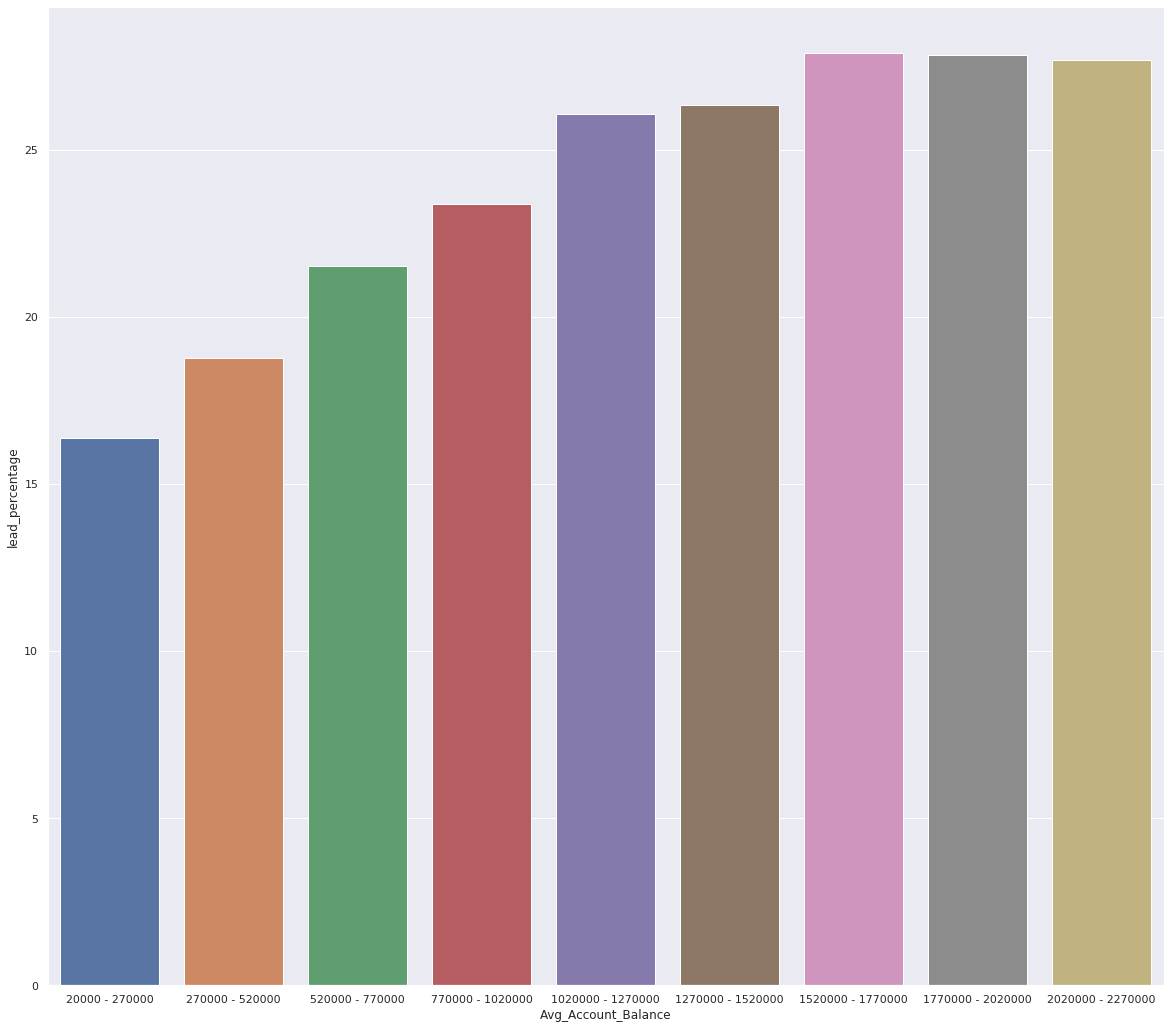

In [1130]:
bins = list(range(20000, 2500000, 250000))
sns.set(rc={'figure.figsize':(20, 18)})
view_categorical_and_numerical_relationship(df, 'Avg_Account_Balance', bins)

### Inferences from Bivariate Analysis
- With increase in Avg_Account_Balance lead conversion chances increases
- Customers in the age group 45 to 65 and 75 to 85 have higher chances of becoming lead
- Customers with vintage 70 to 110 higher chances of becoming lead
- Customers active in last 3 months have 8% higher chance of becoming lead
- Customers using credit product have 11% higher chance of converting to leads
- Channel_Code X3 has highest lead conversions 36 % while channel X1 has lowest- 9%
- Occupation Entrepreneur has highest lead conversions 65 %
- Region code 283, 284, 263 have higher conversions around 30 %
- male customers have 6 % higher chances to become lead

## Preparing data for modelling

In [1131]:
# creating a copy of df to train_df
train_df = df.copy()

In [1132]:
train_df.Gender.value_counts()

Male      123318
Female    103888
Name: Gender, dtype: int64

### 1. Handling categorical variables

In [1133]:
# List of variables to map

varlist =  ['Credit_Product', 'Is_Active']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
train_df[varlist] = train_df[varlist].apply(binary_map)

def convert_gender(x):
    return x.map({'Male': 1, "Female": 0})

# convert gender to numerical
train_df['gender_male'] = train_df[['Gender']].apply(convert_gender)
train_df.drop(varlist ,axis = 1,inplace = True)
train_df.drop(['Gender'] ,axis = 1,inplace = True)

In [1134]:
# encode catefgorical features
categorical_cols = ['Region_Code', 'Occupation', 'Channel_Code']
df_categorical = train_df[categorical_cols]
categorical_dummies = pd.get_dummies(df_categorical, drop_first=True)

# append to original dataframe
train_df = pd.concat([train_df, categorical_dummies], axis = 1)

# drop non-encoded categorical columns
train_df.drop(categorical_cols ,axis = 1,inplace = True)

In [1135]:
# transforming test set
test_df['gender_male'] = test_df[['Gender']].apply(convert_gender)
test_df.drop(varlist ,axis = 1,inplace = True)
test_df.drop(['Gender'] ,axis = 1,inplace = True)

# encode catefgorical features
categorical_cols = ['Region_Code', 'Occupation', 'Channel_Code']
test_df_categorical = test_df[categorical_cols]
categorical_dummies = pd.get_dummies(test_df_categorical, drop_first=True)

# append to original dataframe
test_df = pd.concat([test_df, categorical_dummies], axis = 1)

# drop non-encoded categorical columns
test_df.drop(categorical_cols ,axis = 1,inplace = True)

In [1136]:
train_df.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,gender_male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,...,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,73,43,1045696,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,30,32,581988,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,56,26,1484315,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,34,19,470454,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,30,33,886787,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### 2. Feature Scaling

In [1137]:
scaler = MinMaxScaler()
numerical_cols = ['Age', 'Vintage', 'Avg_Account_Balance']
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

In [1138]:
train_df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead,gender_male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,...,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
count,227206.000,227206.000,227206.000,227206.000,227206.000,227206.000,227206.000,227206.000,227206.000,227206.000,...,227206.000,227206.000,227206.000,227206.000,227206.000,227206.000,227206.000,227206.000,227206.000,227206.000
mean,0.327,0.345,0.379,0.233,0.543,0.025,0.019,0.007,0.105,0.009,...,0.022,0.025,0.111,0.073,0.278,0.301,0.411,0.281,0.261,0.024
std,0.235,0.278,0.200,0.423,0.498,0.157,0.136,0.085,0.306,0.093,...,0.147,0.157,0.314,0.260,0.448,0.459,0.492,0.449,0.439,0.152
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.113,0.118,0.227,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.306,0.227,0.334,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.484,0.564,0.492,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### 3. Check correlations

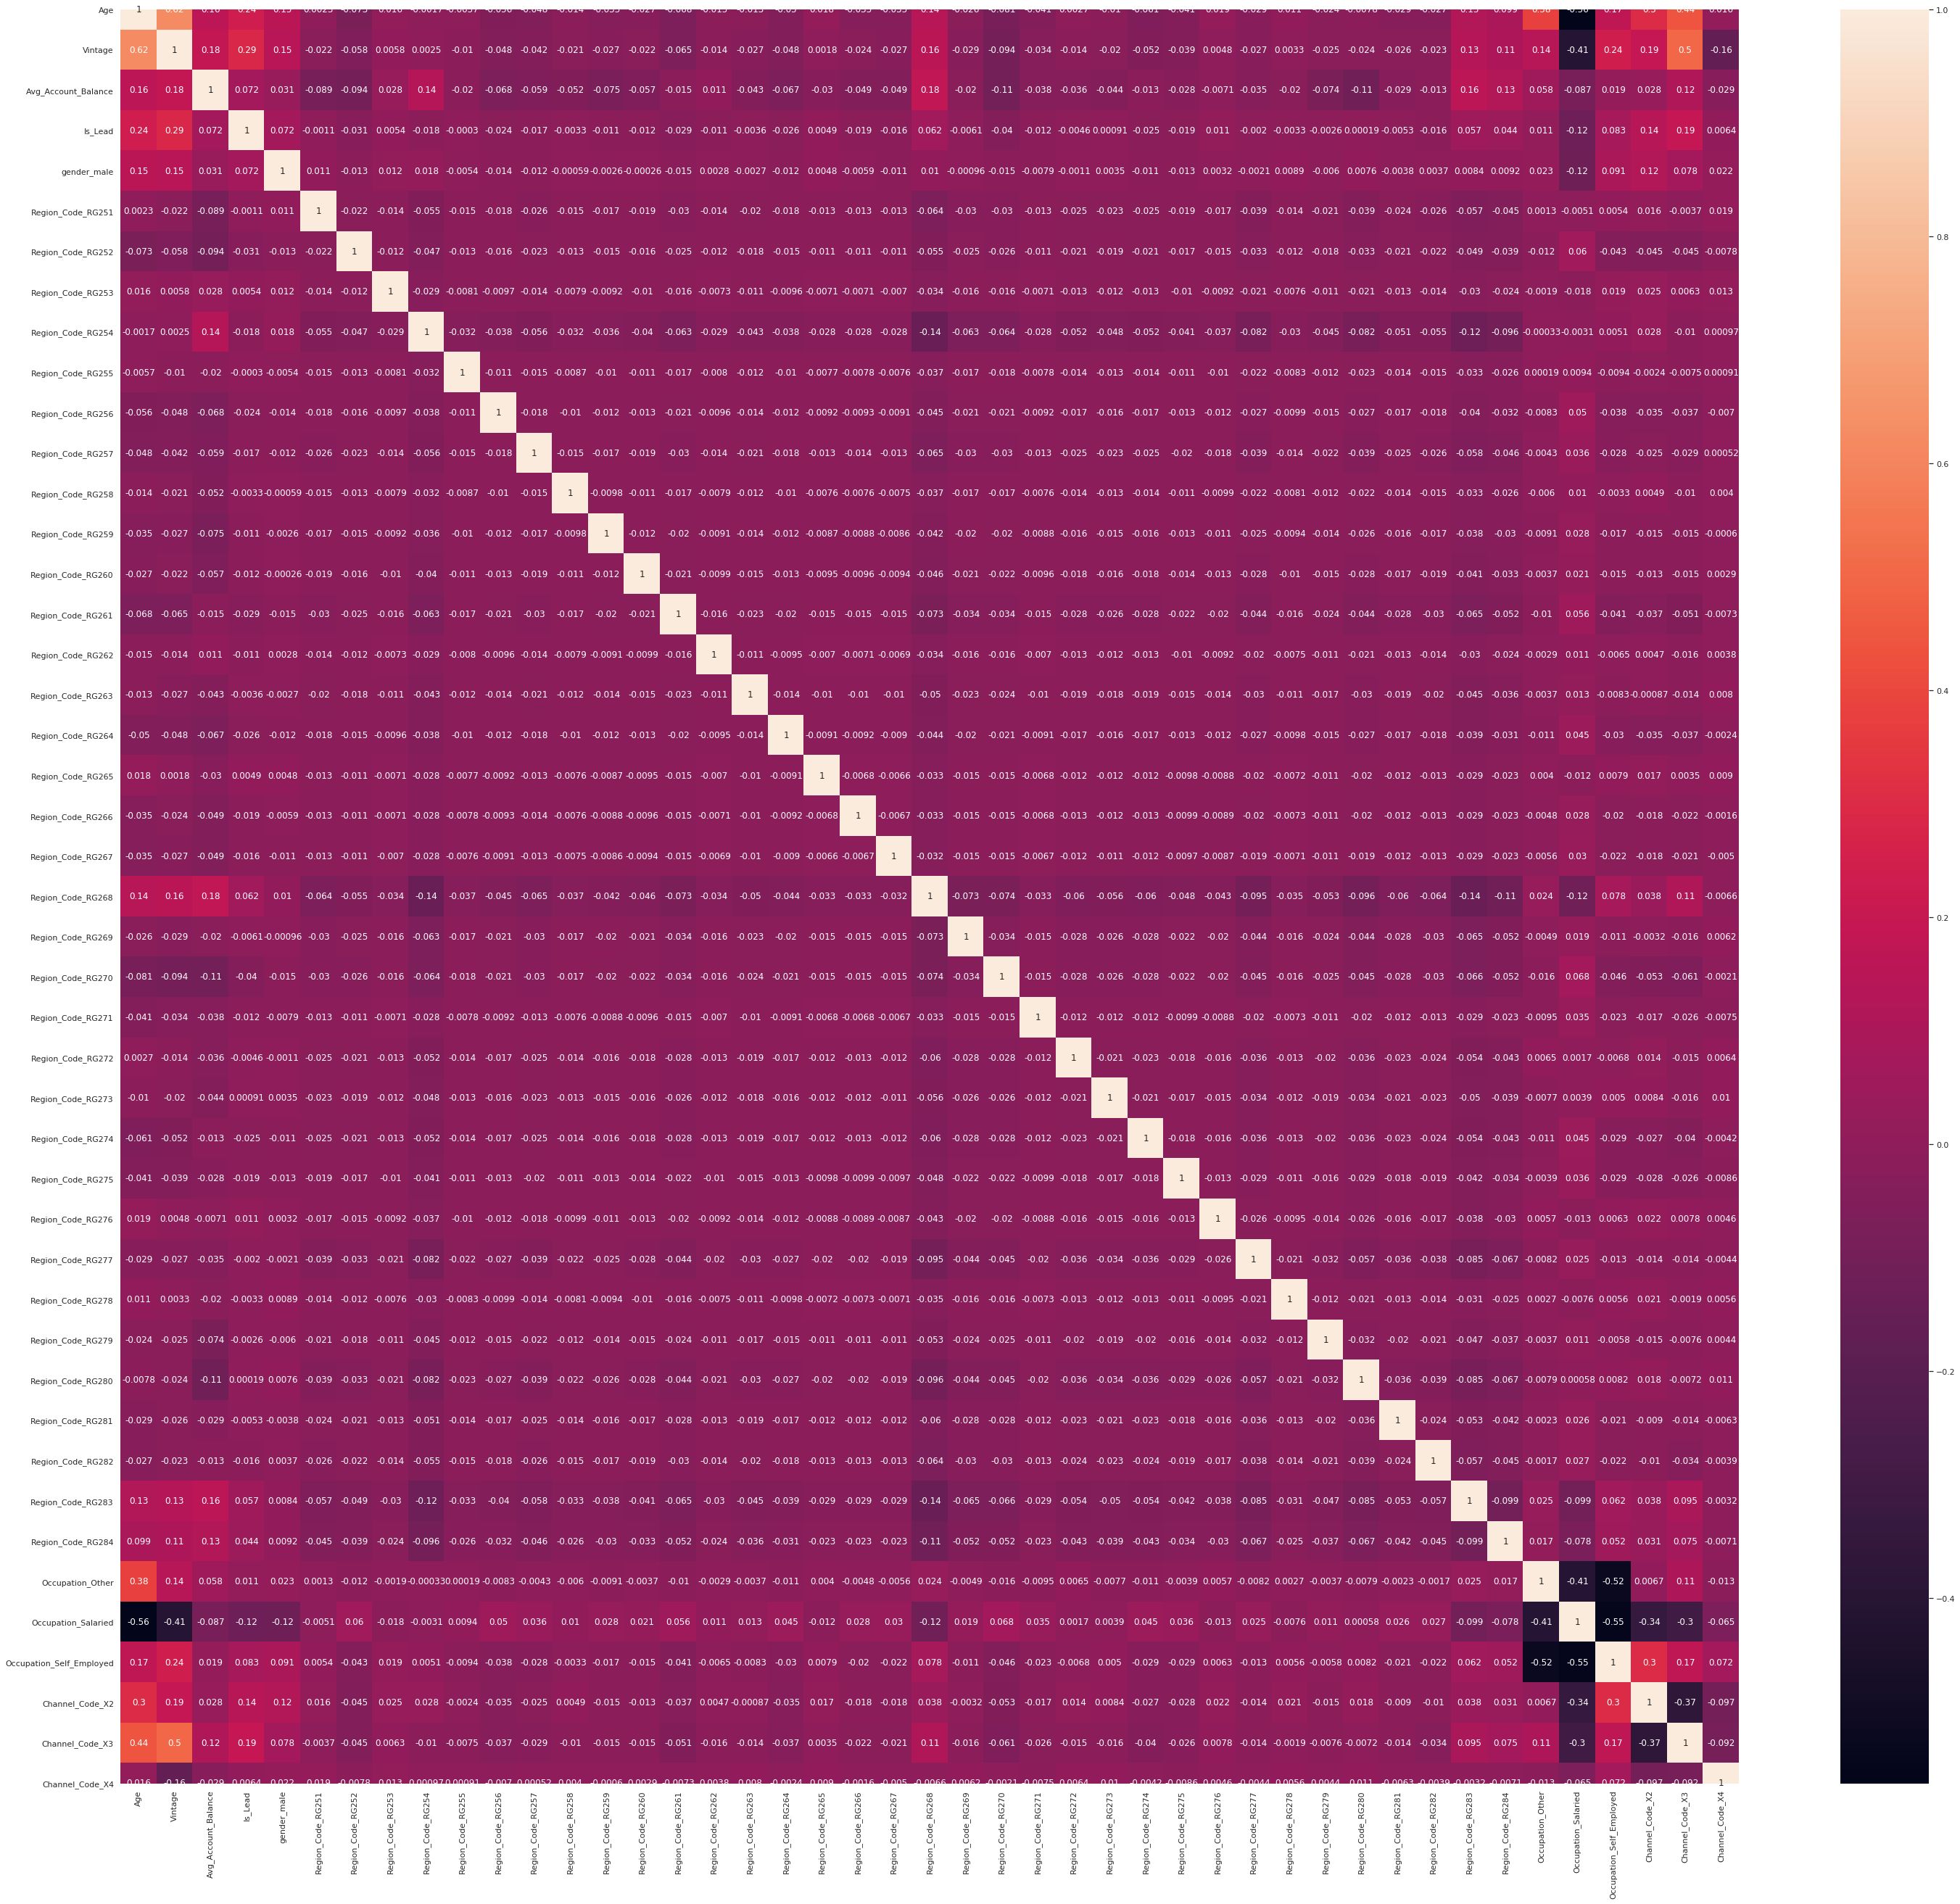

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [1139]:
plt.figure(figsize = (50,45))
sns.heatmap(train_df.corr(),annot = True)
plt.show()
plt.figure(figsize = (8,5))

### 4. Model building

#### Running 1st trainig model

### Splitting data into features and target

In [1140]:
y_train = train_df.pop("Is_Lead")
X_train = train_df.copy()

In [1141]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Is_Lead   No. Observations:               227206
Model:                            GLM   Df Residuals:                   227161
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0858e+05
Date:                Sun, 30 May 2021   Deviance:                   2.1716e+05
Time:                        22:00:21   Pearson chi2:                 2.30e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.9585      0.076    -25.602      0.000      -2.108      -1.809
Age                          0.5423      0.037     14.556      0.000       0.469       0.615
Vintage                      1.2586      0.024     51.525      0.000       1.211       1.306
Avg_Account_Balance          0.1652      0.028      5.803      0.000       0.109       0.221
gender_male                  0.0670      0.011      6.105      0.000       0.045       0.088
Region_Code_RG251            0.1460      0.067      2.167      0.030       0.014       0.278
Region_Code_RG252            0.0021      0.075      0.029      0.977      -0.145       0.150
Region_Code_RG253            0.0842      0.083      1.013      0.311      -0.079       0.247
Region_Code_RG254           -0.0516      0.061     -0.841      0.400      -0.172       0.069
Region_Code_RG255            0.2205      0.082      2.701      0.007       0.060       0.380
Region_Code_RG256            0.0161      0.082      0.197      0.844      -0.144       0.177
Region_Code_RG257            0.1500      0.069      2.188      0.029       0.016       0.284
Region_Code_RG258            0.1683      0.083      2.029      0.042       0.006       0.331
Region_Code_RG259            0.1193      0.079      1.501      0.133      -0.036       0.275
Region_Code_RG260            0.0688      0.077      0.899      0.369      -0.081       0.219
Region_Code_RG261            0.0853      0.067      1.265      0.206      -0.047       0.217
Region_Code_RG262           -0.1102      0.090     -1.226      0.220      -0.286       0.066
Region_Code_RG263            0.1924      0.073      2.646      0.008       0.050       0.335
Region_Code_RG264           -0.0085      0.083     -0.103      0.918      -0.171       0.154
Region_Code_RG265            0.1636      0.085      1.917      0.055      -0.004       0.331
Region_Code_RG266           -0.1621      0.097     -1.665      0.096      -0.353       0.029
Region_Code_RG267           -0.0723      0.097     -0.742      0.458      -0.263       0.119
Region_Code_RG268            0.2075      0.061      3.430      0.001       0.089       0.326
Region_Code_RG269            0.1735      0.066      2.634      0.008       0.044       0.303
Region_Code_RG270            0.0548      0.068      0.805      0.421      -0.079       0.188
Region_Code_RG271            0.1731      0.093      1.860      0.063      -0.009       0.356
Region_Code_RG272            0.0942      0.069      1.368      0.171      -0.041       0.229
Region_Code_RG273            0.2512      0.070      3.597      0.000       0.114       0.388
Region_Code_RG274            0.0335      0.071      0.471      0.638      -0.106       0.173
Region_Code_RG275            0.0632      0.077      0.817      0.414      -0.088       0.215
Region_Code_RG

### Feature Selection Using RFE

In [1142]:
logreg = LogisticRegression()
rfe = RFE(logreg, 17)
rfe = rfe.fit(X_train, y_train)

In [1143]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('Vintage', True, 1),
 ('Avg_Account_Balance', True, 1),
 ('gender_male', False, 16),
 ('Region_Code_RG251', False, 15),
 ('Region_Code_RG252', False, 27),
 ('Region_Code_RG253', False, 20),
 ('Region_Code_RG254', True, 1),
 ('Region_Code_RG255', False, 3),
 ('Region_Code_RG256', False, 28),
 ('Region_Code_RG257', False, 14),
 ('Region_Code_RG258', False, 11),
 ('Region_Code_RG259', False, 17),
 ('Region_Code_RG260', False, 21),
 ('Region_Code_RG261', False, 19),
 ('Region_Code_RG262', True, 1),
 ('Region_Code_RG263', False, 7),
 ('Region_Code_RG264', False, 26),
 ('Region_Code_RG265', False, 12),
 ('Region_Code_RG266', True, 1),
 ('Region_Code_RG267', True, 1),
 ('Region_Code_RG268', False, 6),
 ('Region_Code_RG269', False, 9),
 ('Region_Code_RG270', False, 24),
 ('Region_Code_RG271', False, 10),
 ('Region_Code_RG272', False, 18),
 ('Region_Code_RG273', True, 1),
 ('Region_Code_RG274', False, 25),
 ('Region_Code_RG275', False, 22),
 ('Region_Code_RG276', False, 2),

In [1144]:
X_train.columns[~rfe.support_]

Index(['gender_male', 'Region_Code_RG251', 'Region_Code_RG252',
       'Region_Code_RG253', 'Region_Code_RG255', 'Region_Code_RG256',
       'Region_Code_RG257', 'Region_Code_RG258', 'Region_Code_RG259',
       'Region_Code_RG260', 'Region_Code_RG261', 'Region_Code_RG263',
       'Region_Code_RG264', 'Region_Code_RG265', 'Region_Code_RG268',
       'Region_Code_RG269', 'Region_Code_RG270', 'Region_Code_RG271',
       'Region_Code_RG272', 'Region_Code_RG274', 'Region_Code_RG275',
       'Region_Code_RG276', 'Region_Code_RG280', 'Region_Code_RG281',
       'Region_Code_RG282', 'Region_Code_RG283', 'Region_Code_RG284'],
      dtype='object')

#### Assessing the model with StatsModels

In [1145]:
col = X_train.columns[rfe.support_]
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Is_Lead   No. Observations:               227206
Model:                            GLM   Df Residuals:                   227188
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0865e+05
Date:                Sun, 30 May 2021   Deviance:                   2.1730e+05
Time:                        22:00:48   Pearson chi2:                 2.31e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.7991      0.050    -36.335      0.000      -1.896      -1.702
Age                          0.5510      0.037     14.802      0.000       0.478       0.624
Vintage                      1.2799      0.024     52.703      0.000       1.232       1.328
Avg_Account_Balance          0.2281      0.027      8.517      0.000       0.176       0.281
Region_Code_RG254           -0.2169      0.018    -12.041      0.000      -0.252      -0.182
Region_Code_RG262           -0.2678      0.068     -3.923      0.000      -0.402      -0.134
Region_Code_RG266           -0.3079      0.078     -3.943      0.000      -0.461      -0.155
Region_Code_RG267           -0.2200      0.078     -2.817      0.005      -0.373      -0.067
Region_Code_RG273            0.0966      0.038      2.519      0.012       0.021       0.172
Region_Code_RG277            0.0798      0.024      3.357      0.001       0.033       0.126
Region_Code_RG278           -0.2393      0.061     -3.904      0.000      -0.359      -0.119
Region_Code_RG279            0.1312      0.042      3.150      0.002       0.050       0.213
Occupation_Other            -1.5334      0.047    -32.849      0.000      -1.625      -1.442
Occupation_Salaried         -0.5888      0.048    -12.262      0.000      -0.683      -0.495
Occupation_Self_Employed    -1.4524      0.046    -31.844      0.000      -1.542      -1.363
Channel_Code_X2              1.6061      0.020     79.909      0.000       1.567       1.646
Channel_Code_X3              1.5307      0.021     72.392      0.000       1.489       1.572
Channel_Code_X4              1.7263      0.036     47.559      0.000       1.655       1.797
============================================================================================
"""

### Assessing the model

In [1146]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.301
1   0.130
2   0.255
3   0.108
4   0.125
5   0.068
6   0.230
7   0.199
8   0.265
9   0.334
dtype: float64

In [1147]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30056557, 0.12970733, 0.2549615 , 0.10820072, 0.12523761,
       0.06790058, 0.22988489, 0.19941349, 0.26527831, 0.33412147])

In [1148]:
y_train_pred_final = pd.DataFrame({'Is_Lead':y_train.values, 'Is_Lead_Prob':y_train_pred})
y_train_pred_final.head()

,Is_Lead,Is_Lead_Prob
0,0,0.301
1,0,0.130
2,0,0.255
3,0,0.108
4,0,0.125


In [1149]:
y_train_pred_final['predicted'] = y_train_pred_final.Is_Lead_Prob.map(lambda x: 1 if x > 0.27 else 0)

# Let's see the head
y_train_pred_final.head()

,Is_Lead,Is_Lead_Prob,predicted
0,0,0.301,1
1,0,0.130,0
2,0,0.255,0
3,0,0.108,0
4,0,0.125,0


In [1150]:
from sklearn import metrics

In [1151]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Is_Lead, y_train_pred_final.predicted)
print(confusion)

[[117297  56898]
 [ 19071  33940]]


In [1152]:
print(metrics.accuracy_score(y_train_pred_final.Is_Lead, y_train_pred_final.predicted))

0.6656382313847345


### Check VIF Score

In [1153]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Age,7.710
1,Vintage,5.140
2,Avg_Account_Balance,4.730
13,Occupation_Self_Employed,4.250
15,Channel_Code_X3,3.530
11,Occupation_Other,3.410
14,Channel_Code_X2,3.160
12,Occupation_Salaried,2.090
16,Channel_Code_X4,1.160
3,Region_Code_RG254,1.160


### At this stage we have selected 17 features, the P Values of all the features are < 0.05 and VIF is below 10

### Metrics beyond simply accuracy

In [1154]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Plotting the ROC Curve

In [1155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1156]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Is_Lead, y_train_pred_final.Is_Lead_Prob, drop_intermediate = False )

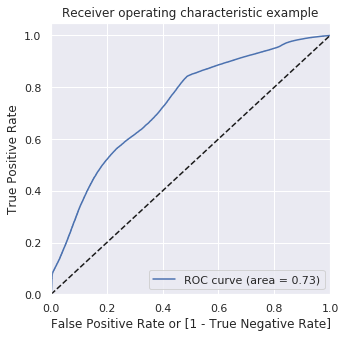

In [1157]:
draw_roc(y_train_pred_final.Is_Lead, y_train_pred_final.Is_Lead_Prob)

In [1175]:
plt.figure(figsize = (8,5))
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Is_Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Is_Lead,Is_Lead_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.301,1,1,1,1,1,0,0,0,0,0,0
1,0,0.130,0,1,1,0,0,0,0,0,0,0,0
2,0,0.255,0,1,1,1,0,0,0,0,0,0,0
3,0,0.108,0,1,1,0,0,0,0,0,0,0,0
4,0,0.125,0,1,1,0,0,0,0,0,0,0,0


<Figure size 576x360 with 0 Axes>

In [1176]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Is_Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

       prob  accuracy  sensi  speci
0.000 0.000     0.233  1.000  0.000
0.100 0.100     0.417  0.932  0.260
0.200 0.200     0.602  0.808  0.540
0.300 0.300     0.694  0.600  0.723
0.400 0.400     0.766  0.347  0.893
0.500 0.500     0.781  0.092  0.991
0.600 0.600     0.778  0.057  0.997
0.700 0.700     0.770  0.018  0.998
0.800 0.800     0.767  0.001  1.000
0.900 0.900     0.767  0.000  1.000


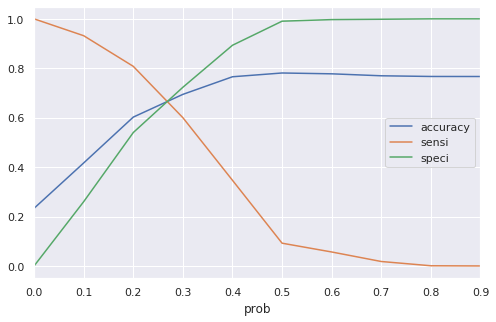

In [1177]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## Making accuracy on test

In [1161]:
X_test = test_df.copy()

In [1162]:
X_test[['Age', 'Vintage', 'Avg_Account_Balance']] = scaler.transform(X_test[['Age', 'Vintage', 'Avg_Account_Balance']])

In [1163]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Age,Vintage,Avg_Account_Balance,Region_Code_RG254,Region_Code_RG262,Region_Code_RG266,Region_Code_RG267,Region_Code_RG273,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1.000,0.097,0.164,0.290,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1.000,0.323,0.382,0.363,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1.000,0.129,0.064,0.078,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.000,0.097,0.236,0.340,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.000,0.097,0.109,0.256,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1164]:
y_test_pred = res.predict(X_test_sm)

In [1165]:
y_test_pred[:10]
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
0,0.038
1,0.273
2,0.098
3,0.052
4,0.044


In [1166]:
y_pred_1['ID'] = test_df.ID

In [1167]:
y_pred_1.head()

,0,ID
0,0.038,VBENBARO
1,0.273,CCMEWNKY
2,0.098,VK3KGA9M
3,0.052,TT8RPZVC
4,0.044,SHQZEYTZ


In [1168]:
y_pred_1= y_pred_1.rename(columns={ 0 : 'Is_Lead'})

In [1169]:
y_final = y_pred_1[['ID', 'Is_Lead']]
y_final.reset_index(drop=True, inplace=True)
y_final.head()

,ID,Is_Lead
0,VBENBARO,0.038
1,CCMEWNKY,0.273
2,VK3KGA9M,0.098
3,TT8RPZVC,0.052
4,SHQZEYTZ,0.044


In [1170]:
y_final['Is_Lead'] = y_final.Is_Lead.map(lambda x: 1 if x > 0.27 else 0)

In [1171]:
y_final.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [1172]:
y_final.to_csv("logistic_pred_1.csv", index=False)